Добрый день! Я Марк. Андан не может оставить равнодушным, а потому будем анализировать датафрейм болезней сердца

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Красивый словарь, чтобы не путаться в переменных.

In [3]:
n = {'age': 'возраст пациента', 
     'sex': 'пол пациента (1 = мужской, 0 = женский)', 
     'cp': 'Chest pain type тип боли в груди (1: типичная стенокардия, 2: нетипичная стенокардия, 3: не стенокардия, 4: бессимптомная)',
     'trestbps': 'Resting blood pressure артериальное давление в состоянии покоя (в мм рт. ст.)',
     'chol': 'Serum cholesterol уровень холестерина в сыворотке крови (мг/дл)',
     'fbs': 'Fasting blood sugar уровень сахара в крови натощак (> 120 мг/дл, 1 = истинно, 0 = ложно)',
     'restecg': 'Resting electrocardiographic results результаты электрокардиографии в состоянии покоя (0: нормально, 1: наличие отклонений, 2: возможная или подтвержденная гипертрофия левого желудочка)',
     'thalch': 'Maximum heart rate achieved максимальная частота сердечных сокращений',
     'exang': 'Exercise-induced angina стенокардия, вызванная физической нагрузкой (1 = да, 0 = нет)',
     'oldpeak': 'депрессия сегмента ST, вызванная физической нагрузкой относительно состояния покоя',
     'slope': 'наклон сегмента ST при пиковой физической нагрузке (0: восходящий, 1: горизонтальный, 2: нисходящий).',
     'ca': 'Number of major vessels colored by fluoroscopy количество основных сосудов (0–3), окрашенных флюороскопией.',
     'thal': 'Thalassemia 0 = нормальный; 1 = фиксированный дефект; 2 = обратимый дефект',
     'num': 'Шкала болезни пациента, где 0 — здоров, 4 — очень болен'}

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Пора причёсывать данные

In [5]:
df = df.drop(columns=['id','dataset','slope','ca','thal'])

In [6]:
col = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
cat = ['cp', 'sex', 'fbs', 'restecg', 'exang', 'num']

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


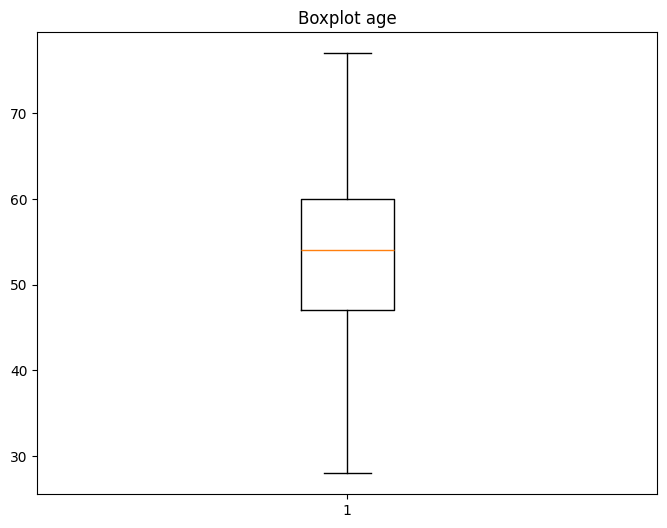

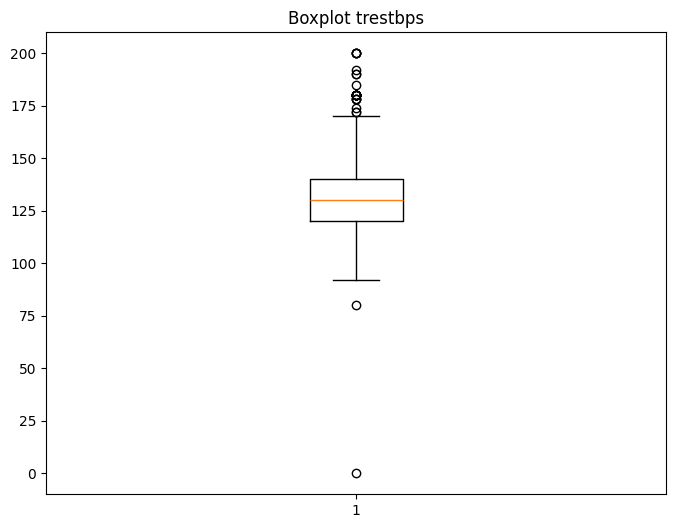

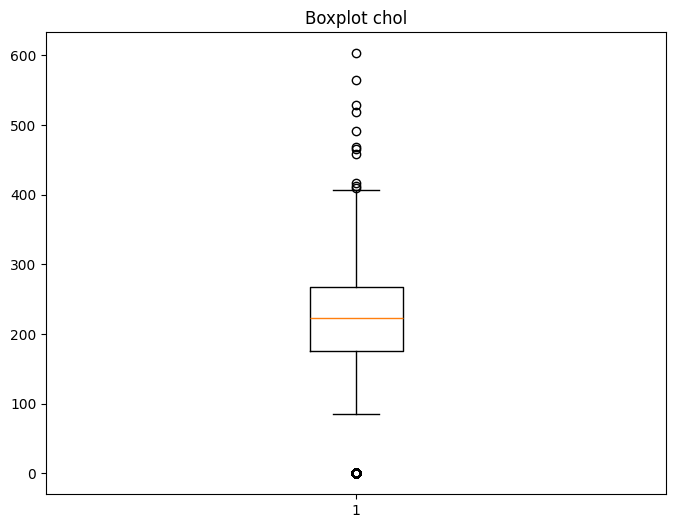

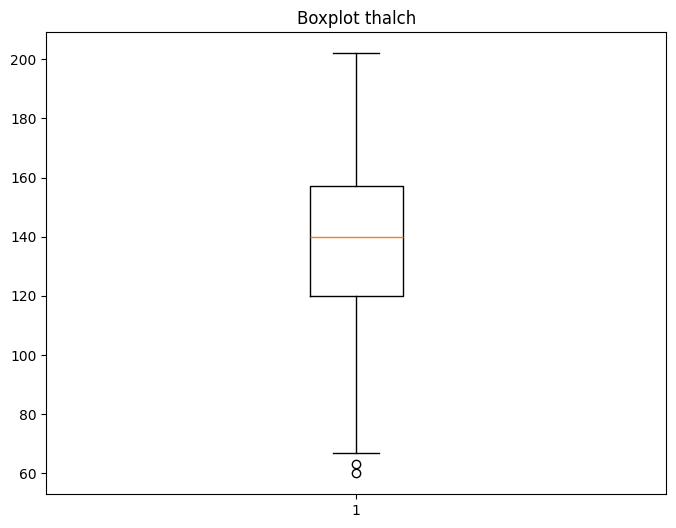

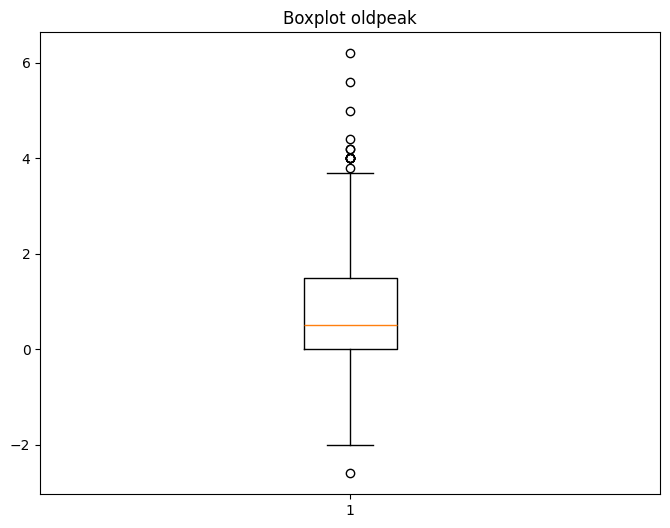

In [8]:
for i in col: #смотрим на выбросы
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[i].dropna(), data = df)
    plt.title(f'Boxplot {i}')
    plt.show()

In [9]:
for i in col:
    df[i] = df[i].fillna(df[i].median())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   920 non-null    float64
 10  num       920 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 79.2+ KB


In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       774 non-null    int64  
 1   sex       774 non-null    object 
 2   cp        774 non-null    object 
 3   trestbps  774 non-null    float64
 4   chol      774 non-null    float64
 5   fbs       774 non-null    object 
 6   restecg   774 non-null    object 
 7   thalch    774 non-null    float64
 8   exang     774 non-null    object 
 9   oldpeak   774 non-null    float64
 10  num       774 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 72.6+ KB


In [13]:
for i in ['trestbps', 'chol']: #навряд ли у живого человека эти показатели могут быть нулевыми...
    df.loc[df[i]==0,i]=df[i].median()

In [14]:
for i in cat: #проверяем, что с категориальными всё в порядке
    print(i, df[i].unique())

cp ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
sex ['Male' 'Female']
fbs [True False]
restecg ['lv hypertrophy' 'normal' 'st-t abnormality']
exang [False True]
num [0 2 1 3 4]


Посмотрим, как распределены переменные

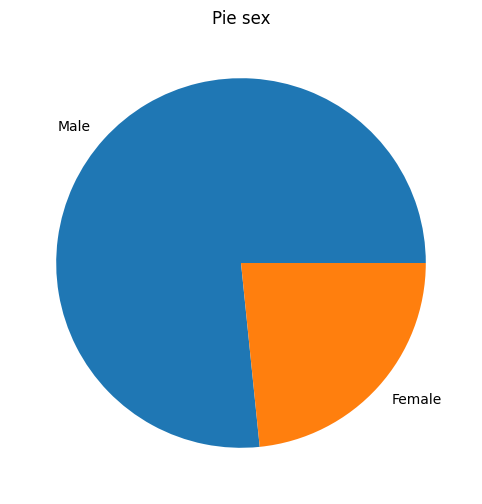

sex: пол пациента (1 = мужской, 0 = женский)


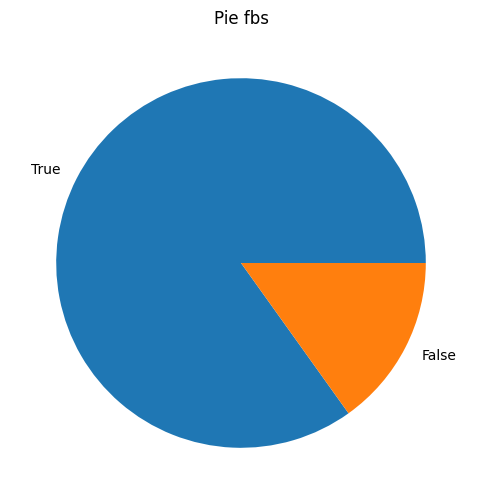

fbs: Fasting blood sugar уровень сахара в крови натощак (> 120 мг/дл, 1 = истинно, 0 = ложно)


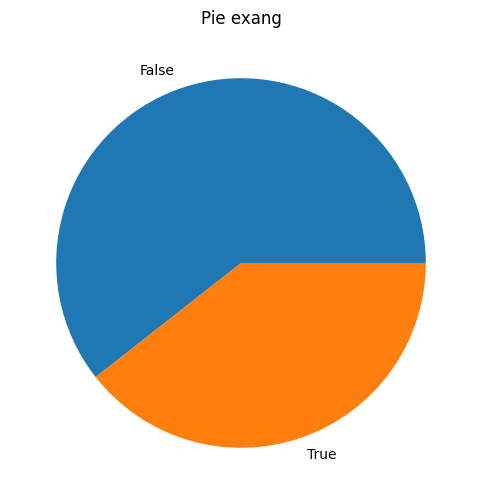

exang: Exercise-induced angina стенокардия, вызванная физической нагрузкой (1 = да, 0 = нет)


In [15]:
for i in ['sex','fbs','exang']: #бинарные качественные
    plt.figure(figsize=(8, 6))
    plt.pie(df[i].value_counts(), labels = df[i].unique())
    plt.title(f'Pie {i}')
    plt.show()
    print(f'{i}: {n[i]}')

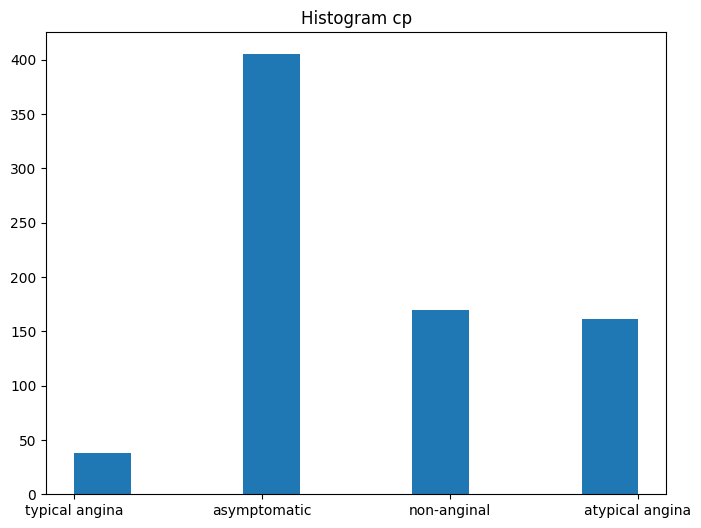

cp: Chest pain type тип боли в груди (1: типичная стенокардия, 2: нетипичная стенокардия, 3: не стенокардия, 4: бессимптомная)


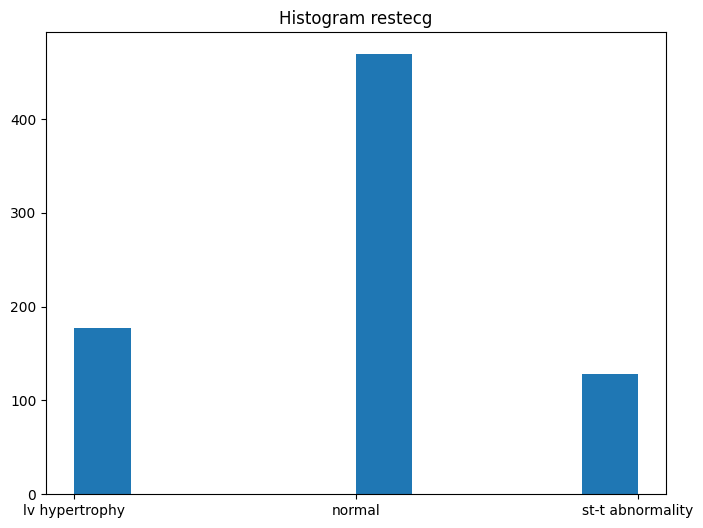

restecg: Resting electrocardiographic results результаты электрокардиографии в состоянии покоя (0: нормально, 1: наличие отклонений, 2: возможная или подтвержденная гипертрофия левого желудочка)


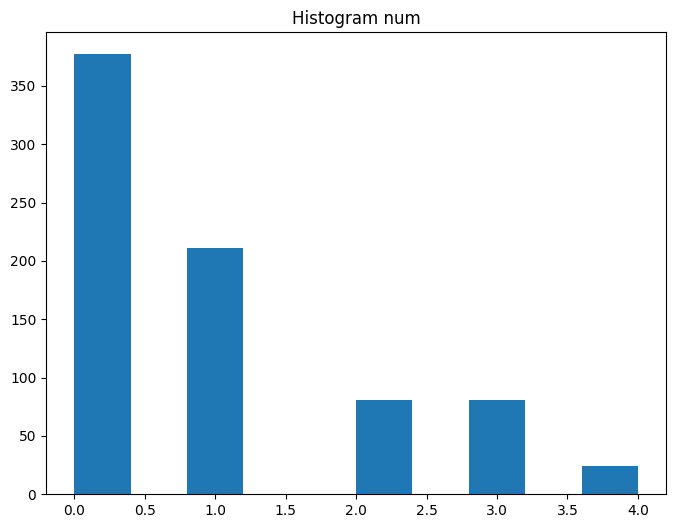

num: Шкала болезни пациента, где 0 — здоров, 4 — очень болен


In [16]:
for i in ['cp', 'restecg', 'num']: #небинарные качественные
    plt.figure(figsize=(8, 6))
    plt.hist(df[i])
    plt.title(f'Histogram {i}')
    plt.show()
    print(f'{i}: {n[i]}')

age: возраст пациента
trestbps: Resting blood pressure артериальное давление в состоянии покоя (в мм рт. ст.)
chol: Serum cholesterol уровень холестерина в сыворотке крови (мг/дл)
thalch: Maximum heart rate achieved максимальная частота сердечных сокращений
oldpeak: депрессия сегмента ST, вызванная физической нагрузкой относительно состояния покоя


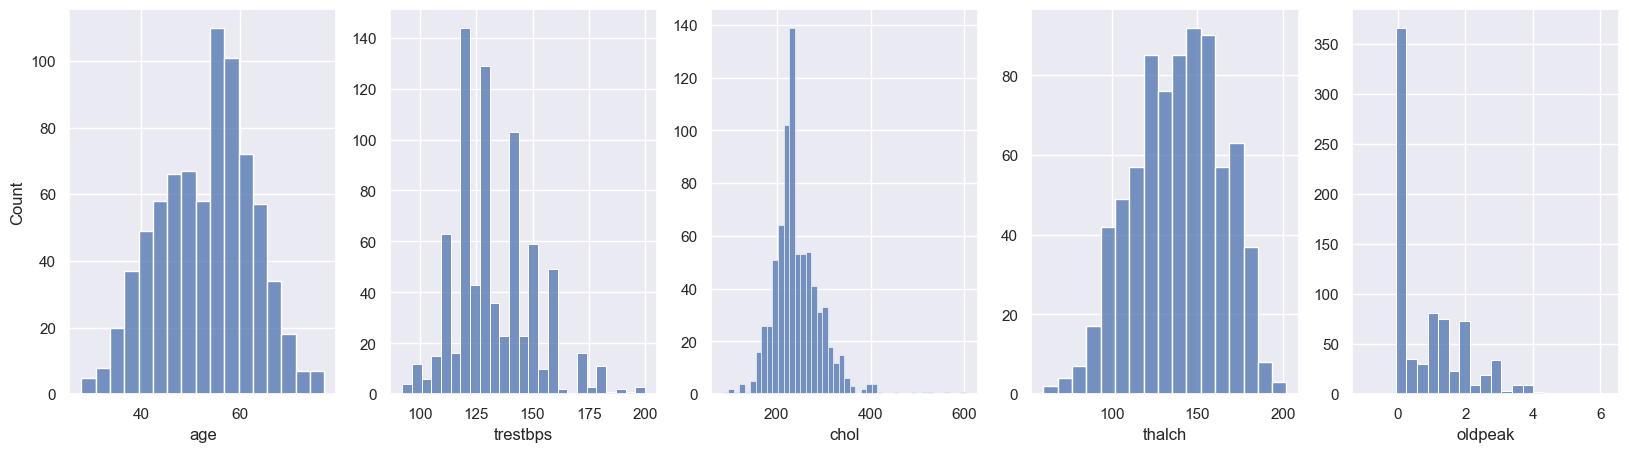

In [17]:
c = 0 #количественные
sns.set(rc={"figure.figsize":(20 , 5)})
for i in col:
    c+=1
    plt.subplot(1, len(col), c)
    if c == 1: sns.histplot(df[i])
    else: 
        hp = sns.histplot(df[i])
        hp.set(ylabel='')
    print(f'{i}: {n[i]}')

 Создадим новую переменную!

In [18]:
df['ag'] = df['age'].apply(lambda x: 'old' if x >= 60 else('norm' if x >= 40 else 'young')) #ag — age groups

In [19]:
df = df[['age','ag','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','num']]

In [20]:
df.head()

,age,ag,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,old,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,old,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,old,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,young,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,norm,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


Пора учить модельку

In [21]:
df = pd.get_dummies(df, drop_first=True) #сделаем наш датафрейм погорячее
df.head()

,age,trestbps,chol,thalch,oldpeak,num,ag_old,ag_young,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True
0,63,145.0,233.0,150.0,2.3,0,True,False,True,False,False,True,True,False,False,False
1,67,160.0,286.0,108.0,1.5,2,True,False,True,False,False,False,False,False,False,True
2,67,120.0,229.0,129.0,2.6,1,True,False,True,False,False,False,False,False,False,True
3,37,130.0,250.0,187.0,3.5,0,False,True,True,False,True,False,False,True,False,False
4,41,130.0,204.0,172.0,1.4,0,False,False,False,True,False,False,False,False,False,False


А теперь... чего мы хотим?

In [22]:
x = df.drop(columns='num') #По набору параметров
y = df['num'] #определить болен ли пациент и насколько
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8) #глубокий мысль

In [23]:
from sklearn.preprocessing import StandardScaler #нормализуем количественные переменные

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[col])
X_test_scaled = scaler.transform(X_test[col])

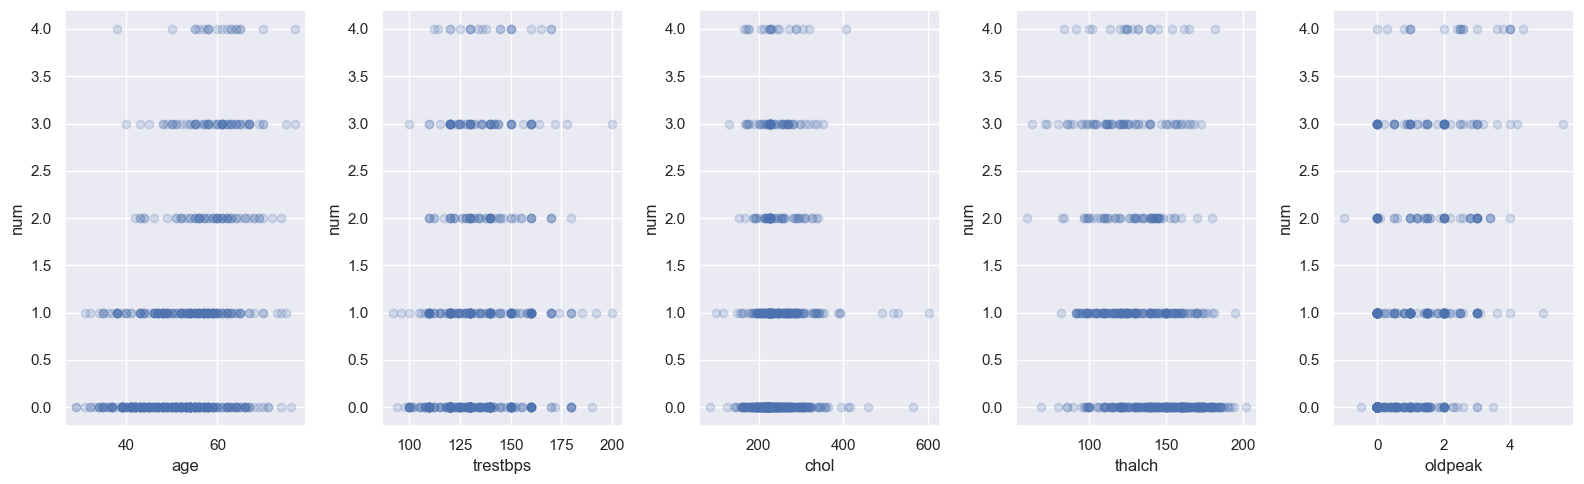

In [24]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=len(col)) #списано из тетрадки, ну картинки ж красивые...
for i, feature in enumerate(col):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("num")
plt.tight_layout()

In [25]:
y_pred = np.zeros_like(y_test) #для начала построим наивную модель
accuracy_score(y_test, y_pred) #не, ну тоже лучше, чем ничего, но вообще ну такое

0.4774193548387097

In [33]:
# дальше я честно пытался разобраться, как всё нормально реализовать... но... не разобрался
# так что, как сказал студент ФЭН перед получением неуда за проект: "Ладно! И так сойдёт"
# а создателю тетрадки рекомендую писать также доступно, как тут: https://tproger.ru/translations/scikit-learn-in-python
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
accuracy_score(y_test, KNN_prediction)

0.4838709677419355